<a href="https://colab.research.google.com/github/sunitabasi/project/blob/main/project_beautifulsoup_stock_market_project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from bs4 import BeautifulSoup
import requests
url = BeautifulSoup('https://www.sharesansar.com/live-trading', 'html.parser')
soup = requests.get(url)
soup

<ipython-input-35-b148caab732a>:3: MarkupResemblesLocatorWarning:

The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



<Response [200]>

In [36]:
soup = BeautifulSoup(soup.text,'lxml')
soup.table

<table class="table table-bordered table-striped table-hover dataTable compact" id="headFixed">
<thead>
<tr>
<th width="10px">S.No</th>
<th>Symbol</th>
<th class="text-center">LTP</th>
<th class="text-center">Point Change</th>
<th class="text-center">% Change</th>
<th class="text-center">Open</th>
<th class="text-center">High</th>
<th class="text-center">Low</th>
<th class="text-center">Volume</th>
<th class="text-center">Prev. Close</th>
</tr>
</thead>
<tbody>
<tr>
<td class="success-index">
                                        1</td>
<td class="success-index">
<a href="https://www.sharesansar.com/company/aclbsl" title="ACLBSL">ACLBSL</a>
</td>
<td class="text-center success-index">
                                        945.00</td>
<td class="text-center success-index">
                                        45.00</td>
<td class="text-center success-index">
                                        5.00</td>
<td class="text-center success-index">
                                  

In [37]:

#all_data =[]
#heading = soup.find_all('th')

#for data in heading:
  #i = data.text.strip()
  #all_data.append(i)
alldata = []
column = soup.find_all('tr')
for rows in column:
  row_data = rows.find_all(['th','td'])    # finding out th and td at the same time
  rowlist =[]
  for item in row_data:
    y = item.text.strip()
    rowlist.append(y)
  alldata.append(rowlist)
print(alldata)


[['S.No', 'Symbol', 'LTP', 'Point Change', '% Change', 'Open', 'High', 'Low', 'Volume', 'Prev. Close'], ['1', 'ACLBSL', '945.00', '45.00', '5.00', '882.10', '955.00', '866.00', '37,972.00', '900.00'], ['2', 'ADBL', '241.10', '-2.90', '-1.19', '248.80', '248.80', '239.00', '24,081.00', '244.00'], ['3', 'ADBLD83', '1,080.00', '-18.50', '-1.68', '1,080.00', '1,080.00', '1,080.00', '80.00', '1,098.50'], ['4', 'AHL', '429.20', '-13.80', '-3.12', '449.00', '451.00', '428.00', '16,194.00', '443.00'], ['5', 'AHPC', '162.00', '-3.00', '-1.82', '168.30', '168.30', '161.70', '16,093.00', '165.00'], ['6', 'AKJCL', '203.10', '-3.90', '-1.88', '205.00', '208.90', '203.00', '16,277.00', '207.00'], ['7', 'AKPL', '165.10', '-2.00', '-1.20', '165.70', '168.30', '164.10', '31,149.00', '167.10'], ['8', 'ALBSL', '900.00', '20.00', '2.27', '879.90', '928.20', '865.00', '34,035.00', '880.00'], ['9', 'ALICL', '571.80', '-3.70', '-0.64', '564.00', '575.00', '564.00', '14,300.00', '575.50'], ['10', 'ALICLP', '3

In [38]:
import csv
file = open('nepse.csv','w')
x = csv.writer(file)
x.writerows(alldata)
file.close()

In [39]:
import pandas as pd
df = pd.read_csv('nepse.csv', index_col = 'S.No')
df

,Symbol,LTP,Point Change,% Change,Open,High,Low,Volume,Prev. Close
S.No,,,,,,,,,
1,ACLBSL,945.00,45.0,5.00,882.10,955.00,866.00,"37,972.00",900.00
2,ADBL,241.10,-2.9,-1.19,248.80,248.80,239.00,"24,081.00",244.00
3,ADBLD83,"1,080.00",-18.5,-1.68,"1,080.00","1,080.00","1,080.00",80.00,"1,098.50"
4,AHL,429.20,-13.8,-3.12,449.00,451.00,428.00,"16,194.00",443.00
5,AHPC,162.00,-3.0,-1.82,168.30,168.30,161.70,"16,093.00",165.00
...,...,...,...,...,...,...,...,...,...
311,USHL,462.10,-7.9,-1.68,462.00,471.00,462.00,"3,345.00",470.00
312,USLB,"2,317.00",3.0,0.13,"2,314.00","2,335.00","2,253.00","26,763.00","2,314.00"
313,VLBS,909.00,43.0,4.97,868.00,928.00,868.00,"39,636.00",866.00


In [40]:
#df = df[0:10]

In [41]:
LTP = [float(i.replace(',','')) for i in df['LTP']]
LTP

[945.0,
 241.1,
 1080.0,
 429.2,
 162.0,
 203.1,
 165.1,
 900.0,
 571.8,
 312.0,
 2188.0,
 170.2,
 918.9,
 235.0,
 3700.0,
 364.0,
 387.0,
 650.0,
 496.0,
 320.0,
 544.0,
 520.0,
 16071.0,
 12810.0,
 295.0,
 8.27,
 851.8,
 1040.0,
 1052.1,
 387.0,
 790.0,
 437.0,
 810.0,
 313.7,
 2110.0,
 589.0,
 1023.0,
 523.9,
 458.0,
 8.7,
 8.16,
 469.0,
 1597.0,
 158.0,
 753.1,
 196.8,
 1325.0,
 406.0,
 403.0,
 512.0,
 1062.4,
 391.4,
 448.0,
 838.0,
 670.1,
 1261.0,
 992.0,
 364.0,
 985.0,
 176.0,
 800.0,
 483.9,
 456.8,
 150.0,
 8.16,
 1253.8,
 2110.0,
 205.0,
 1355.0,
 387.0,
 433.0,
 693.0,
 441.5,
 1220.0,
 8.75,
 832.0,
 175.6,
 1046.0,
 150.0,
 133.4,
 1302.0,
 606.8,
 355.0,
 354.0,
 163.1,
 98.9,
 1060.4,
 399.0,
 256.2,
 556.6,
 283.6,
 511.0,
 1205.4,
 535.0,
 389.9,
 1379.9,
 539.0,
 1587.3,
 1000.0,
 295.9,
 1470.0,
 510.0,
 308.0,
 1460.0,
 137.0,
 1059.5,
 8.7,
 810.0,
 8.1,
 220.0,
 1000.0,
 960.0,
 413.3,
 425.0,
 371.0,
 8.03,
 372.0,
 1119.0,
 999.0,
 182.3,
 9.5,
 1315.0,
 1145.

In [42]:
# sorted_df = df.sort_values(by = "Volume",ascending = False)
# sorted_df

In [43]:
import plotly.express as px
fig = px.bar(df[0:10], x= 'Symbol', y='Volume')
fig.show()


In [44]:
import plotly.express as px
fig = px.histogram(df[0:10], x="Symbol", y="LTP", height = 500)

fig.show()

In [45]:
print(df.columns)

Index(['Symbol', 'LTP', 'Point Change', '% Change', 'Open', 'High', 'Low',
       'Volume', 'Prev. Close'],
      dtype='object')


In [56]:
df = df[0:10]
df

,Symbol,LTP,Point Change,% Change,Open,High,Low,Volume,Prev. Close
S.No,,,,,,,,,
1,ACLBSL,945.00,45.0,5.00,882.10,955.00,866.00,"37,972.00",900.00
2,ADBL,241.10,-2.9,-1.19,248.80,248.80,239.00,"24,081.00",244.00
3,ADBLD83,"1,080.00",-18.5,-1.68,"1,080.00","1,080.00","1,080.00",80.00,"1,098.50"
4,AHL,429.20,-13.8,-3.12,449.00,451.00,428.00,"16,194.00",443.00
5,AHPC,162.00,-3.0,-1.82,168.30,168.30,161.70,"16,093.00",165.00
6,AKJCL,203.10,-3.9,-1.88,205.00,208.90,203.00,"16,277.00",207.00
7,AKPL,165.10,-2.0,-1.20,165.70,168.30,164.10,"31,149.00",167.10
8,ALBSL,900.00,20.0,2.27,879.90,928.20,865.00,"34,035.00",880.00
9,ALICL,571.80,-3.7,-0.64,564.00,575.00,564.00,"14,300.00",575.50


In [57]:
import plotly.graph_objects as go    #data comparing
High = [float(i.replace(',','')) for i in df['High']]
Symbol = df['Symbol']
Open = df['Open']
Close = df['Prev. Close']
fig = go.Figure(data=[
    go.Bar(name='Open', x=Symbol, y=Open),
    go.Bar(name='Close', x=Symbol, y=Close)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [58]:
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=Symbol, y=LTP)])

fig.show()

In [59]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure(data=[go.Candlestick(x=df['Symbol'],
              open=df['Open'], high=df['High'],
                low=df['Low'], close=df['Prev. Close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

#through this we can find open close high and low price of the stock

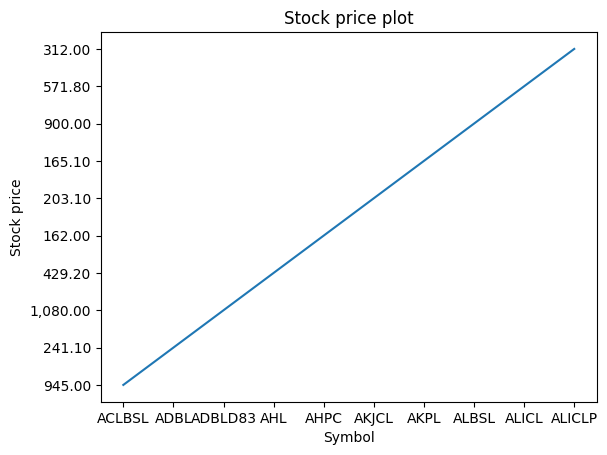

In [60]:
import matplotlib.pyplot as plt
x = df['Symbol']
y = df['LTP']
plt.plot(x,y)
plt.title('Stock price plot')
plt.xlabel('Symbol')
plt.ylabel('Stock price')

plt.show()

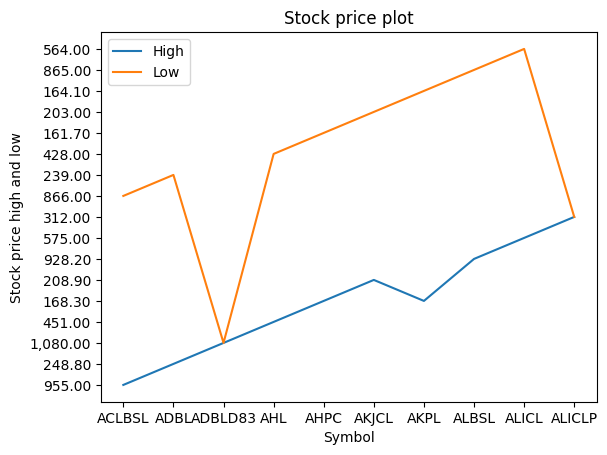

In [61]:
x = df['Symbol']
y1 = df['High']
y2 = df['Low']
plt.plot(x,y1,label = "High")   #defining label
plt.plot(x,y2, label = "Low")
plt.title('Stock price plot')
plt.xlabel('Symbol')
plt.ylabel('Stock price high and low')
plt.legend()     # if you want to add lable types you have to define legend
plt.show()

In [72]:
df['new_Volume'] = [float(i.replace(',','')) for i in df['Volume']]
df['new_Volume']

<ipython-input-72-7a35743809f0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



S.No
1     37972.0
2     24081.0
3        80.0
4     16194.0
5     16093.0
6     16277.0
7     31149.0
8     34035.0
9     14300.0
10    75426.0
Name: new_Volume, dtype: float64

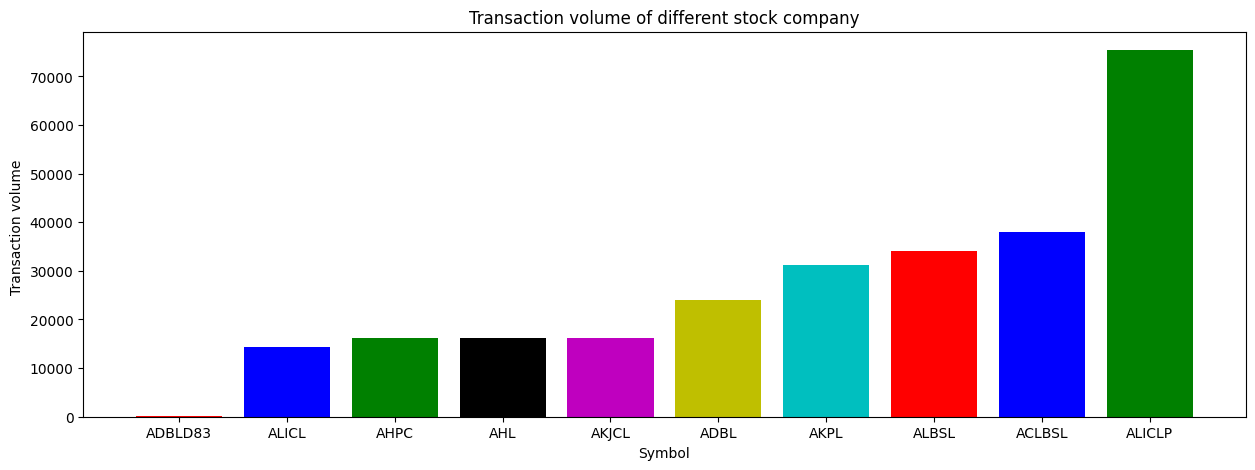

In [76]:
sorted_df = df.sort_values(by = 'new_Volume',ascending = True)

plt.figure(figsize=(15,5))
x = sorted_df['Symbol']
y = sorted_df['new_Volume']
plt.bar(x,y, color = ['r','b','g','k','m','y','c'])
plt.xlabel('Symbol')
plt.ylabel('Transaction volume ')
plt.title('Transaction volume of different stock company')

#plt.legend()
plt.plot()
plt.show()